## Learning Objectives

At the end of the miniproject, you will be able to :

* load and extract features of images using ImageDataGenerator

* build the convolutional neural networks

* use the pre-trained models using keras applications

## Introduction

This project uses a Deep Neural Network, more specifically a Convolutional Neural Network, to differentiate between images of people, with masks, without masks and incorrectly placed masks. Manually built and pretrained networks will be used to perform this classification task.

**Face-Mask-Detection-Using-CNN**

* Outbreak of the Coronavirus pandemic has created various changes in the lifestyle of everyone around the world.
* Among these changes, wearing a mask has been very vital to every individual.
* Detection of people who are not wearing masks is a challenge due to the large populations.
* This face mask detection project can be used in schools, hospitals, banks, airports etc as a digitalized scanning tool.
  - The technique of detecting people’s faces and segregating them into three classes namely the people with masks and people without masks and partial masks is done with the help of image processing and deep learning.
* With the help of this project, a person who is monitoring the face mask status for a particular firm can be seated in a remote area and still monitor efficiently and give instructions accordingly.

![img](https://cdn.iisc.talentsprint.com/CDS/MiniProjects/dataset-images-with-mask.jpg)

## Dataset

The data for this mini-project is collected from various sources including the masked images from internet and general frontal face images considered as without mask. This dataset consists of 5029 train images and 1059 test images with 3 classes `with_mask`, `without_mask` and `partial_mask`

Many people do not correctly wear their masks due to bad practices, bad behaviors or vulnerability of individuals (e.g., children, old people). For these reasons, several mask wearing campaigns intend to sensitize people about this problem and good practices. In this sense, this work proposes three types of masked face detection dataset:
  
- Without Mask/ With Mask/ Partial Mask
  
Note that this dataset contains some annotated (artificially generated) masks to augment the 'masked' data category.

## Problem Statement

To build and implement a Convolutional Neural Network model to classify between masked/unmasked/partially masked faces.

Download and unzip dataset from: https://cdn.iisc.talentsprint.com/CDS/MiniProjects/MP2_FaceMask_Dataset.zip

In [1]:
# Download and unzip data
# https://www.google.com/url?q=https%3A%2F%2Fcdn.iisc.talentsprint.com%2FCDS%2FMiniProjects%2FMP2_FaceMask_Dataset.zip
import requests, zipfile, io
r = requests.get('https://cdn.iisc.talentsprint.com/CDS/MiniProjects/MP2_FaceMask_Dataset.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

### Import Required packages

In [2]:
# type: ignore
import numpy as np
from matplotlib import pyplot as plt
import PIL
from PIL import Image   # ✅ correct way

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from keras.preprocessing import image
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

## Data Loading and preprocessing

### Analyze the shape of images and distribution of classes

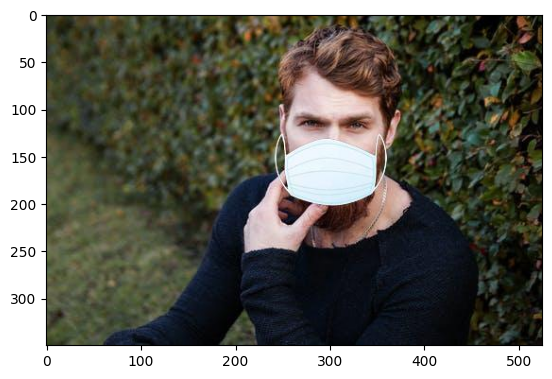

In [3]:
# YOUR CODE HERE
temp = PIL.Image.open("MP2_FaceMask_Dataset/train/with_mask/0-with-mask.jpg")
plt.imshow(temp)

### Load the images using ImageDataGenerator

There are two main steps involved in creating the generator.
1. Instantiate ImageDataGenerator with required arguments to create an object
2. Use the `flow_from_directory` command depending on how your data is stored on disk. This is the command that will allow you to generate and get access to batches of data on the fly.

Hint: [link](https://keras.io/api/preprocessing/image/)

In [4]:
TRAINING_DIR = "MP2_FaceMask_Dataset/train/"
VALIDATION_DIR = "MP2_FaceMask_Dataset/test/"

In [5]:
# YOUR CODE HERE
IMAGE_SIZE = 128
BATCH_SIZE = 32

# Data generators
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=0.1/255, width_shift_range=0.2, height_shift_range=0.3, zoom_range=0.4, rotation_range=30)
# Create generators
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 5029 images belonging to 3 classes.
Found 1259 images belonging to 3 classes.


### Visualize the sample images of each class using data generator

Hint: plt.subplot

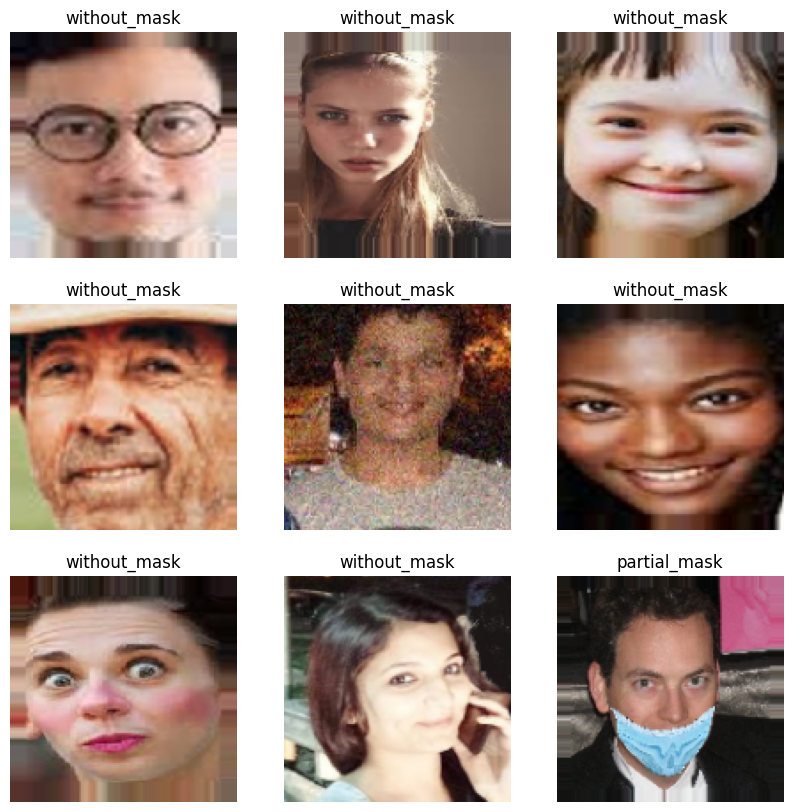

In [6]:
# YOUR CODE HERE
images, labels = next(train_generator)
class_labels = list(train_generator.class_indices.keys())

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(class_labels[np.argmax(labels[i])])
    plt.axis("off")
plt.show()

## Build the CNN model using Keras


**Convolutional Neural Network:** A neural network in which at least one layer is a convolutional layer. A typical convolutional neural network consists of some combination of the following layers:

* convolutional layers
* pooling layers
* dense layers


**Conv2D**  

Passing an image with input shape of 3-D and to calculate the output:

 $O = \frac{n - f + 2p}{s} + 1$

 where

 $n$ = image dimension

 $f$ = filter size

 $p$ = padding

 $s$ = stride

**MaxPool**

The resulting output, when using the "valid" padding option, has a spatial shape (number of rows or columns) of:

O = `math.floor`$(\frac{input shape - pool size)}{ strides}) + 1$ (when input shape >= pool size)

The resulting output shape when using the "same" padding option is:

O = `math.floor`$(\frac{input shape - 1}{strides}) + 1$

by default, stride = None, so stride is same as pool size

Task-flow
* Initialize the network of convolution, maxpooling and dense layers
* Define the optimizer and loss functions
* Fit the model and evaluate the model

In [7]:
# YOUR CODE HERE
from tensorflow.keras.optimizers import Adam

# Build CNN
model = Sequential()

# 1st Convolution + Pooling
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

# 2nd Convolution + Pooling
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

# 3rd Convolution + Pooling
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten + Dense Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # prevents overfitting
model.add(Dense(3, activation='softmax'))  # 3 classes: with_mask, without_mask, partial_mask

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
print(model.summary())

EPOCHS = 25

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    verbose=1
)

c:\Users\kruth\Downloads\face_mask_detection_CNN\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,923 (12.61 MB)

 Trainable params: 3,305,475 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

None


c:\Users\kruth\Downloads\face_mask_detection_CNN\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 47s 282ms/step - accuracy: 0.8835 - loss: 1.1236 - val_accuracy: 0.4241 - val_loss: 9.1600
Epoch 2/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 44s 277ms/step - accuracy: 0.9224 - loss: 0.3165 - val_accuracy: 0.4241 - val_loss: 15.3626
Epoch 3/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 44s 279ms/step - accuracy: 0.9487 - loss: 0.1801 - val_accuracy: 0.4241 - val_loss: 18.1516
Epoch 4/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 44s 279ms/step - accuracy: 0.9529 - loss: 0.1872 - val_accuracy: 0.4241 - val_loss: 28.5952
Epoch 5/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 44s 279ms/step - accuracy: 0.9588 - loss: 0.1574 - val_accuracy: 0.4265 - val_loss: 5.7946
Epoch 6/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 44s 281ms/step - accuracy: 0.9598 - loss: 0.1454 - val_accuracy: 0.4241 - val_loss: 12.2452
Epoch 7/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 46s 294ms/step - accuracy: 0.9684 - loss: 0.1048 - val_accuracy: 0.4265 - val_loss: 4.3848
Epoch 8/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 46s 292ms/step - accuracy: 0.9706 - los

## Transfer learning

Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem.

A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task.

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.

For eg. Using VGG16, we remove the last layer which takes a probability for each of the 1000 classes in the ImageNet and replaces it with a layer that takes 3 probabilities in our case.

### Use the pre-trained models ([VGG16](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16) or [ResNet50](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50))

* Load the pre-trained model
* Fit and evaluate the data

Hint: [How to use pre-trained model](https://towardsdatascience.com/step-by-step-guide-to-using-pretrained-models-in-keras-c9097b647b29)

#### Expected accuracy: More than 90%

Task-flow
* Initialize the network with the weights of Imagenet
* Fine tune the network by modifying fully connected layers.
* Re-train the model with our problem data

In [8]:
# YOUR CODE HERE
from tensorflow.keras.layers import GlobalAveragePooling2D
# Load base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze most layers, unfreeze last block for fine-tuning
for layer in base_model.layers[:-4]:   # unfreeze last 4 conv layers
    layer.trainable = False

# Build classifier
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

# New model
model_transfer = Model(inputs=base_model.input, outputs=predictions)

In [9]:
# Compile with smaller learning rate
model_transfer.compile(optimizer=Adam(learning_rate=1e-5),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

In [10]:
# Train with more data augmentation
EPOCHS = 15
history_transfer = model_transfer.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Evaluate
loss_transfer, accuracy_transfer = model_transfer.evaluate(validation_generator)
print(f"Test Loss: {loss_transfer:.4f}")
print(f"Test Accuracy: {accuracy_transfer:.4f}")

Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 130s 821ms/step - accuracy: 0.7064 - loss: 0.6777 - val_accuracy: 0.4776 - val_loss: 1.1212
Epoch 2/15
  1/157 ━━━━━━━━━━━━━━━━━━━━ 1:45 678ms/step - accuracy: 0.9062 - loss: 0.2315

c:\Users\kruth\Downloads\face_mask_detection_CNN\venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 146ms/step - accuracy: 0.9062 - loss: 0.2315 - val_accuracy: 0.4487 - val_loss: 1.1257
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 127s 808ms/step - accuracy: 0.9572 - loss: 0.1276 - val_accuracy: 0.4848 - val_loss: 1.2103
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 163ms/step - accuracy: 0.9688 - loss: 0.0580 - val_accuracy: 0.4784 - val_loss: 1.2093
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 139s 884ms/step - accuracy: 0.9722 - loss: 0.0783 - val_accuracy: 0.4519 - val_loss: 1.3191
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 163ms/step - accuracy: 0.9688 - loss: 0.0711 - val_accuracy: 0.4551 - val_loss: 1.3232
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 142s 905ms/step - accuracy: 0.9830 - loss: 0.0538 - val_accuracy: 0.5152 - val_loss: 1.4132
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 157ms/step - accuracy: 1.0000 - loss: 0.0196 - val_accuracy: 0.5192 - val_loss: 1.4032
Epoch 9/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 139s 884ms/step - accuracy: 0.9868 - loss: 0.0402 -

### Capture the live image using the below code cell and predict

Saved to photo.jpeg


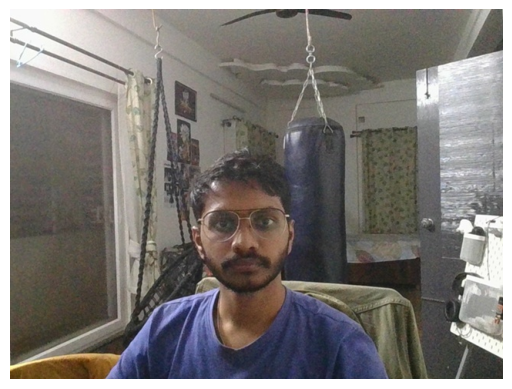

In [18]:
#@title Capture the photo
from IPython.display import display, Javascript
from base64 import b64decode
import cv2

def take_photo(filename='photo.jpeg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('content/image/jpeg', quality);
    }
    ''')
  display(js)

def capture_image(filename="photo.jpeg"):
    cap = cv2.VideoCapture(0)  # 0 = default webcam
    if not cap.isOpened():
        print("Error: Could not open webcam")
        return None

    ret, frame = cap.read()
    cap.release()

    if ret:
        cv2.imwrite(filename, frame)
        print(f"Saved to {filename}")
        return filename
    else:
        print("Error: Failed to capture image")
        return None
filename = capture_image("photo.jpeg")
if filename:
    img = PIL.Image.open(filename)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

After executing above cell and capturing the photo, load the captured photo and predict with model.

**Note:**
* Convert the image to numpy array and resize to the shape which the model accepts.
* Extend the dimension (to 4-D shape) of an image, as the model is trained on a batch of inputs.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Prediction: without_mask


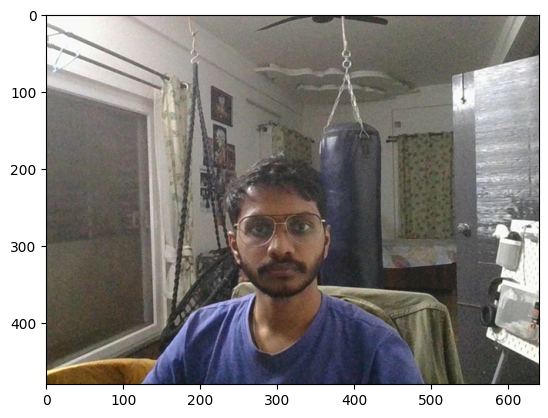

In [19]:
features = PIL.Image.open("photo.jpeg")
plt.imshow(features)
# YOUR CODE HERE to predict the image
# Preprocess the image to match model input size
img = img.resize((128,128))                  # resize to (128,128)
img_array = np.array(img) / 255.0            # normalize
img_array = np.expand_dims(img_array, axis=0) # add batch dimension

# Predict
pred = model.predict(img_array)
class_idx = np.argmax(pred, axis=1)[0]

# Map prediction to class label
labels = list(train_generator.class_indices.keys())
print("Prediction:", labels[class_idx])

### Report Analysis

- Compare the accuracies for the Pre-trained vs CNN models
- What process was followed to tune the hyperparameters?
- Which model detects the mask/no mask/ partial mask more accurately with the live pictures?
- Discuss the confusion matrix in terms of the misclassifications

# Type report here

1. Compare the accuracies for the Pre-trained vs CNN models

* CNN model: ~98.22% training accuracy, but only ~42.41% validation accuracy → clear overfitting.

* VGG16 (transfer learning): ~99.87% training, ~45.11% validation, and ~47.26% test accuracy.

* Both overfitted, but VGG16 generalized slightly better on unseen data.

---

2. Hyperparameter tuning process

* Optimizer: Adam.

* Learning rates: CNN → 0.001, VGG16 → 1e-5 (smaller for stable fine-tuning).

* Epochs: CNN trained for 25, VGG16 for 15.

* Regularization: Dropout (0.5) applied.

* Data augmentation: shear, zoom, rotation, shifts, and horizontal flips.

* Hyperparameters tuned manually (not via automated search).

---

3. Model accuracy on live detection (mask/no mask/partial mask)

* CNN tested on live images: able to classify into three categories but inconsistent due to weak validation accuracy.

* VGG16 not tested live, though based on test accuracy, it would likely be slightly more reliable than CNN.

4. Confusion matrix and misclassifications

* Partial_mask class caused the most confusion.

* Frequently misclassified as either with_mask or without_mask.

* Without_mask was sometimes confused with partial_mask when the face was only partly covered.

* Overall, the model struggled most with distinguishing partial masks from the other two classes.